In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
df = pd.read_csv('tweets.zip')
df

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,11554,2022-08-27 09:37:33.966285+00,Perpetrators Free InSSRCase,1563450246876737536,2022-08-27 08:56:01+00,bunty81t,Prashant Kishor,NaN,44,"RT @SauravS91139716: Good Morning Warrior's,\n...",Delhi,en,62,2010-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web App,False
5228,11555,2022-08-27 09:37:33.96842+00,Perpetrators Free InSSRCase,1563450246373380096,2022-08-27 08:56:00+00,privin07,Preeti🇮🇳 (God➡️Karma🤗🔱🤛🙏💞),God is d ultimate power🌺\nShiva+Shakti🔱🙏\nKris...,3781,RT @GauriSh00526155: @privin07 @IAmApa07 @itsS...,National Capital 🇮🇳,en,4,2009-09-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5229,11556,2022-08-27 09:37:33.970742+00,Perpetrators Free InSSRCase,1563450245652312064,2022-08-27 08:56:00+00,Justice78602373,Justice For SSR,Fan of Sushant❤️\nSSR Alive in our hearts ❤️ f...,3154,RT @Dipshik37409256: According to SSR's family...,NaN,en,14,2020-07-22,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False
5230,11557,2022-08-27 09:37:33.97306+00,Perpetrators Free InSSRCase,1563450243899092993,2022-08-27 08:56:00+00,kundu_ssrian,Koushani Kundu(SSRian),"Proud to be your fan Sushant , proud to be you...",476,RT @rd20082022: Sushant loved life and was pla...,India,en,24,2021-01-07,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False


In [47]:
df.isnull().sum()

id                            0
hashtag_generation_time       0
searched_hashtag              0
tweet_id                      0
tweet_created_at              0
screen_name                   0
name                          0
user_description            958
followers_count               0
tweet                         0
location                   2645
iso_language_code             0
retweet_count                 0
user_created_at               0
favorite_count                0
entities                      0
tweet_source                  0
verified                      0
clean_tweet                   0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5232 non-null   int64 
 1   hashtag_generation_time  5232 non-null   object
 2   searched_hashtag         5232 non-null   object
 3   tweet_id                 5232 non-null   int64 
 4   tweet_created_at         5232 non-null   object
 5   screen_name              5232 non-null   object
 6   name                     5232 non-null   object
 7   user_description         4274 non-null   object
 8   followers_count          5232 non-null   int64 
 9   tweet                    5232 non-null   object
 10  location                 2587 non-null   object
 11  iso_language_code        5232 non-null   object
 12  retweet_count            5232 non-null   int64 
 13  user_created_at          5232 non-null   object
 14  favorite_count           5232 non-null  

preprocessing the dataset

In [4]:
#remove pattern in the input text
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt = re.sub(word, '', input_txt)
    return input_txt


In [7]:
df.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,clean_tweet
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : Thanks a lot Diyu for such lovely words...
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase \n\nTruth an...
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase🔥
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,RT : Why Rhea Chakraborty's custodial interrog...
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase🔥🔥


In [6]:
# remove twitter handle (@user)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [8]:
df.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,clean_tweet
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : Thanks a lot Diyu for such lovely words...
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase \n\nTruth an...
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase🔥
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,RT : Why Rhea Chakraborty's custodial interrog...
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase🔥🔥


In [9]:
#remove special characters, numbers and punctuations
df['clean_tweet']=df['clean_tweet'].str.replace('^a-zA-Z#', " ")
df.head()

C:\Users\SHAIKH SOHEL\AppData\Local\Temp\ipykernel_9720\334025934.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweet']=df['clean_tweet'].str.replace('^a-zA-Z#', " ")


,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,clean_tweet
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : Thanks a lot Diyu for such lovely words...
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase \n\nTruth an...
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase🔥
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,RT : Why Rhea Chakraborty's custodial interrog...
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,RT : CBI Unfold D Truth InSSRCase🔥🔥


In [10]:
#remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,clean_tweet
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,Thanks Diyu such lovely words amazing Sushi pr...
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,Unfold Truth InSSRCase Truth justice above bey...
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,Unfold Truth InSSRCase🔥
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,Rhea Chakraborty's custodial interrogation don...
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,Unfold Truth InSSRCase🔥🔥


In [11]:
# indivisual words considered as tokens
tokenized_tweet= df["clean_tweet"].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Thanks, Diyu, such, lovely, words, amazing, S...
1    [Unfold, Truth, InSSRCase, Truth, justice, abo...
2                          [Unfold, Truth, InSSRCase🔥]
3    [Rhea, Chakraborty's, custodial, interrogation...
4                         [Unfold, Truth, InSSRCase🔥🔥]
Name: clean_tweet, dtype: object

In [12]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet =tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [thank, diyu, such, love, word, amaz, sushi, p...
1    [unfold, truth, inssrcas, truth, justic, abov,...
2                          [unfold, truth, inssrcase🔥]
3    [rhea, chakraborty', custodi, interrog, done, ...
4                         [unfold, truth, inssrcase🔥🔥]
Name: clean_tweet, dtype: object

In [13]:
#combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])

df['clean_tweet']=tokenized_tweet
df.head()

,id,hashtag_generation_time,searched_hashtag,tweet_id,tweet_created_at,screen_name,name,user_description,followers_count,tweet,location,iso_language_code,retweet_count,user_created_at,favorite_count,entities,tweet_source,verified,clean_tweet
0,7549,2022-08-26 13:56:37.490901+00,CBI Unfold D Truth InSSRCase,1563158353391779844,2022-08-26 13:36:08+00,ATUL7735,ATUL,NaN,301,RT @privin07: @divine__ssr @ATUL7735 Thanks a ...,India,en,4,2011-03-15,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,thank diyu such love word amaz sushi proud all...
1,6327,2022-08-26 13:54:52.480426+00,CBI Unfold D Truth InSSRCase,1563163059002101762,2022-08-26 13:54:50+00,BabyPink1803,Alli,Justice 4 Disha & SSR ~ :): 💛🦋💫 ~Your vibes sp...,1115,RT @keesain99: CBI Unfold D Truth InSSRCase \n...,Australia,en,114,2012-08-21,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,unfold truth inssrcas truth justic abov beyond...
2,6328,2022-08-26 13:54:52.618819+00,CBI Unfold D Truth InSSRCase,1563163056934334464,2022-08-26 13:54:49+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @ChintuJainHS: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,2,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,unfold truth inssrcase🔥
3,6329,2022-08-26 13:54:52.656809+00,CBI Unfold D Truth InSSRCase,1563163055390744576,2022-08-26 13:54:49+00,its_ssrwarrior,S U P R I Y A,A Proud Fan of Sushant Singh Rajput.,2006,RT @sushfanseg: Why Rhea Chakraborty's custodi...,Earth,en,6,2020-10-02,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for Android,False,rhea chakraborty' custodi interrog done cbi?? ...
4,6330,2022-08-26 13:54:52.696796+00,CBI Unfold D Truth InSSRCase,1563163052102791168,2022-08-26 13:54:48+00,Tanutoor85,🍁𝓚𝓞𝓚𝓞(TanuToor)🍁,Anshu ♥️|2.0 ♥️|Anaya ♥️|Aansh♥️Luv♥️|Kokdoo♥️...,2776,RT @manisha_1604: @SatyaSSRian1 @PMOIndia @DoP...,Canada,en,10,2021-01-01,0,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,False,unfold truth inssrcase🔥🔥


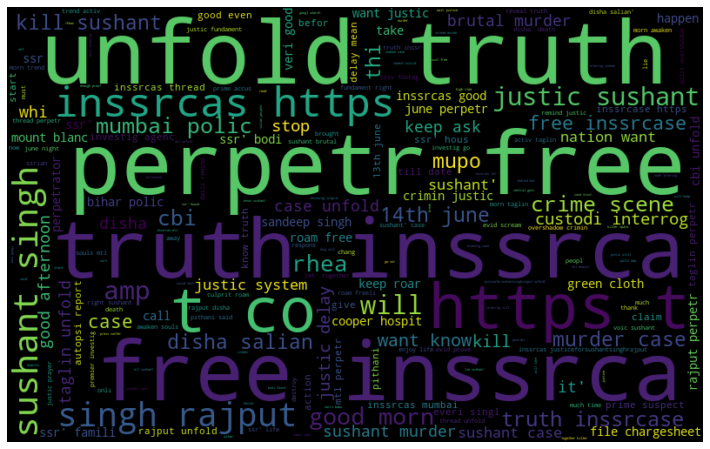

In [17]:
#visualize the frequent words
all_word =" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_word)

#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

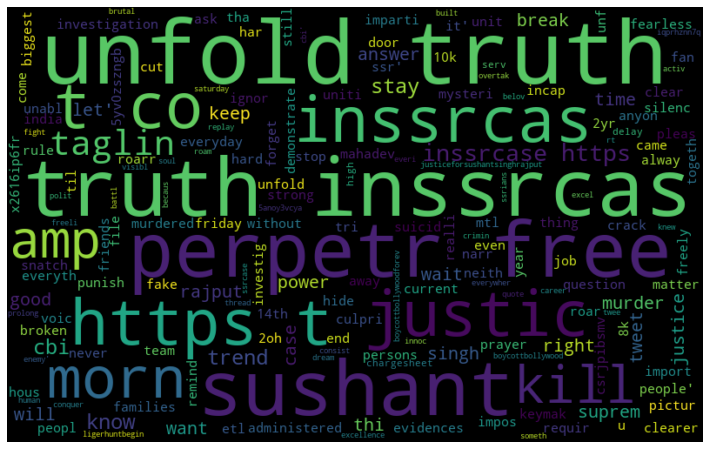

In [18]:
#frequent words visualization for possitive 
all_word =" ".join([sentence for sentence in df['clean_tweet'][df['followers_count']==0]])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_word)

#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

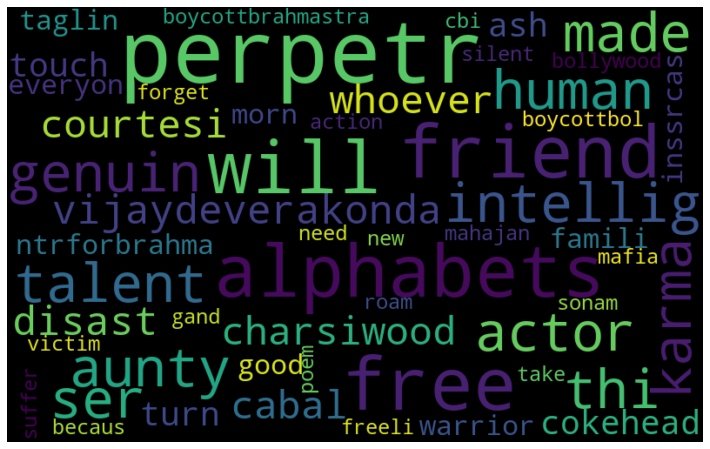

In [19]:
#frequent words visualization for negative
all_word =" ".join([sentence for sentence in df['clean_tweet'][df['followers_count']==1]])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_word)

#plot the graph 
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
#extract the hashtag
def hashtag_extract(tweet):
    hashtags=[]
    #loop word in the tweet
    for word in tweet:
        ht=re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [48]:
#extract hashtag from non resist/sexiest tweets
ht_pssitive= hashtag_extract(df['clean_tweet'][df['screen_name']==0])

#extract hashtag from non resist/sexiest tweets
ht_negative= hashtag_extract(df['clean_tweet'][df['screen_name']==1])

In [51]:
ht_pssitive

[]

In [50]:
ht_negative[:5]

[]